In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

1. ĐỌC DỮ LIỆU

In [18]:
# Đọc dữ liệu xlsx
file_path = "Online Retail.xlsx"
df = pd.read_excel(file_path)

print("Huỳnh Thiên Huy - 6351071028")
print(df.shape)
print(df.head())

Huỳnh Thiên Huy - 6351071028
(541909, 8)
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


2. TIỀN XỬ LÝ DỮ LIỆU

In [13]:
print("Huỳnh Thiên Huy – 6351071028")

df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]
print("Đã làm sạch dữ liệu.")

Huỳnh Thiên Huy – 6351071028
Đã làm sạch dữ liệu.


3. TẠO GIỎ HÀNG CHO NƯỚC ĐỨC (GERMANY)

In [14]:
print("Huỳnh Thiên Huy - 6351071028")

basket = (df[df['Country'] == "Germany"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

def encode_data(datapoint):
    if datapoint <= 0:
        return 0
    if datapoint >= 1:
        return 1

basket_sets = basket.applymap(encode_data)

if 'POSTAGE' in basket_sets.columns:
    basket_sets.drop('POSTAGE', inplace=True, axis=1)
    print("Đã xóa cột POSTAGE.")

print(f"Kích thước giỏ hàng: {basket_sets.shape}")

Huỳnh Thiên Huy - 6351071028
Đã xóa cột POSTAGE.
Kích thước giỏ hàng: (457, 1694)


4. TÌM TẬP PHỔ BIẾN (APRIORI)

In [15]:
print("Huỳnh Thiên Huy - 6351071028")

frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)
print("Các tập phổ biến tìm được:")
print(frequent_itemsets.head(10))

Huỳnh Thiên Huy - 6351071028
Các tập phổ biến tìm được:
    support                        itemsets
0  0.102845        (6 RIBBONS RUSTIC CHARM)
1  0.070022     (ALARM CLOCK BAKELIKE PINK)
2  0.065646   (CHARLOTTE BAG APPLES DESIGN)
3  0.050328  (CHILDRENS CUTLERY DOLLY GIRL)
4  0.061269      (COFFEE MUG APPLES DESIGN)
5  0.063457    (FAWN BLUE HOT WATER BOTTLE)
6  0.072210             (GUMBALL COAT RACK)
7  0.056893          (IVORY KITCHEN SCALES)
8  0.063457         (JAM JAR WITH PINK LID)
9  0.091904        (JAM MAKING SET PRINTED)


5. TẠO LUẬT KẾT HỢP

In [16]:
print("Huỳnh Thiên Huy - 6351071028")

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

rules["antecedents"] = rules["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules["consequents"] = rules["consequents"].apply(lambda x: list(x)[0]).astype("unicode")

print(f"Tìm thấy {len(rules)} luật kết hợp.")
print("\nDanh sách các luật:")
for i in range(len(rules)):
    print(f"{rules.loc[i, 'antecedents']} ==> {rules.loc[i, 'consequents']} "
          f"[Sup: {rules.loc[i, 'support']:.4f}, Conf: {rules.loc[i, 'confidence']:.4f}]")

Huỳnh Thiên Huy - 6351071028
Tìm thấy 8 luật kết hợp.

Danh sách các luật:
PLASTERS IN TIN CIRCUS PARADE ==> PLASTERS IN TIN WOODLAND ANIMALS [Sup: 0.0678, Conf: 0.5849]
PLASTERS IN TIN SPACEBOY ==> PLASTERS IN TIN WOODLAND ANIMALS [Sup: 0.0613, Conf: 0.5714]
PLASTERS IN TIN WOODLAND ANIMALS ==> ROUND SNACK BOXES SET OF4 WOODLAND [Sup: 0.0744, Conf: 0.5397]
RED RETROSPOT CHARLOTTE BAG ==> WOODLAND CHARLOTTE BAG [Sup: 0.0591, Conf: 0.8438]
ROUND SNACK BOXES SET OF4 WOODLAND ==> ROUND SNACK BOXES SET OF 4 FRUITS [Sup: 0.1313, Conf: 0.5357]
ROUND SNACK BOXES SET OF 4 FRUITS ==> ROUND SNACK BOXES SET OF4 WOODLAND [Sup: 0.1313, Conf: 0.8333]
SPACEBOY LUNCH BOX ==> ROUND SNACK BOXES SET OF4 WOODLAND [Sup: 0.0700, Conf: 0.6809]
WOODLAND CHARLOTTE BAG ==> ROUND SNACK BOXES SET OF4 WOODLAND [Sup: 0.0635, Conf: 0.5000]


6. BIỂU DIỄN TRỰC QUAN (SCATTER PLOT)

Huỳnh Thiên Huy - 6351071028


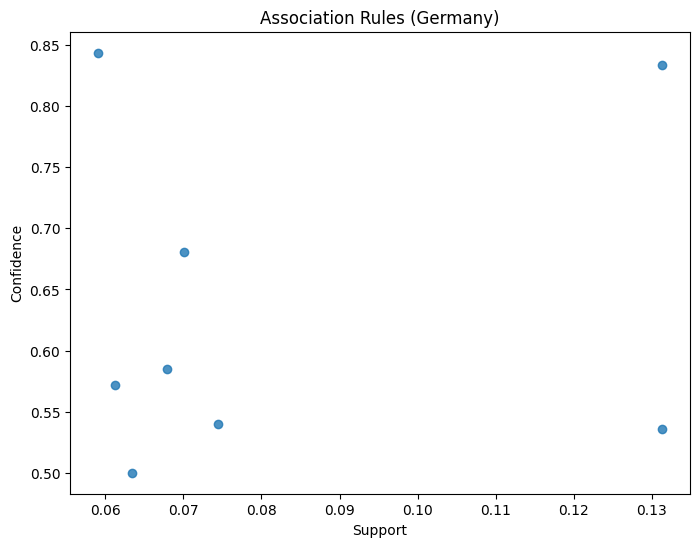

In [17]:
print("Huỳnh Thiên Huy - 6351071028")

support = rules['support'].values
confidence = rules['confidence'].values

plt.figure(figsize=(8, 6))
plt.title('Association Rules (Germany)')
plt.xlabel('Support')
plt.ylabel('Confidence')
sns.regplot(x=support, y=confidence, fit_reg=False)
plt.show()
